# Занятие 8. АБ-тестирование (проверяем все в онлайн-экспериментах)

### План занятия

1. вспоминаем самое первое занятие
2. "типичное" устройство АБ-тестов
3. метрики для сравнения
4. оценка размера выборки ДО проведения эксперимента
5. параметрические и непараметрические критерии

Пример как может выглядеть решение задачи бизнеса с помощью ML

<img src="images/tdsp-lifecycle2.png" alt="TDSP" style="width: 800px;" align="center"/>

Если же сделать процесс более "линейным", то он может выглядеть так:

Проблема -> Анализ -> Продуктовая гипотеза -> Метрики и критерии приемки -> ML решение -> AB-тестирование -> Оценка результатов -> Интеграция с другими командами

#### Что такое "продуктовая гипотеза"?

Предположение о том, что мы ожидаем при том или ином изменении в продукте (новый функционал вроде системы рекомендаций или улучшение уже существующего). Под изменением обычно подразумевается улучшение некоторой бизнес-метрики. 

### Пример - сервис для чтения книг онлайн

- чтение книг онлайн
- монетизация в основном за счет подписок + платный контент
- стабильный DAU**
<img src="images/books.png" alt="reading" style="width: 400px;" align="right"/>

** DAU (daily active users) - число уникальных пользователей за сутки

Что же мы хотим сделать? - улучшить наш сервис, чтобы он стал более удобным для пользователей и более прибыльным для бизнеса.

Один из вариантов это сделать - <b>персональные рекомендации</b>**

** по персональным рекомендациям и как такие системы строятся - есть курс на geekbrains

Предположим, что мы со своей частью справляемся и можем сделать простейшую систему рекомендаций книг.

Что дальше?

## Сразу в "прод"?
<img src="images/good_enough.jpg" alt="good_enough" style="width: 200px;" align="center"/>

## Конечно же нет!

#### Что нам нужно сделать?

1. Формулировка задачи и выбор метрики (DS)
2. Сбор данных и подготовка датасета
3. Построение модели (обучение)
4. Оборачивание всего этого в пайплайн обучения (для того, чтобы использовать в production)
5. Оценка результатов и проведение экспериментов
6. Мониторинг качества, логгирование

### Практический пример 1

Допустим, что мы занимаемся рекомендациями в интернет-магазине.<br>
У нас уже есть рекомендательная система на основе метода A. 

При этом в результате исследований метод B показал лучшие по сравнению с А офлайн-метрики (обычно ML-метрики)

Означает ли, что такое решение будет лучше и с точки зрения бизнес-метрик? - Необязательно, мы должны будем это проверить. 

### Метрика для нашего примера?

В случае с рекомендательной системой может быть много разных метрик, которые нам в итоге будут интересны:

1. arpu (average revenue per user) - средняя выручка одного пользователя
2. appu (average purchases per user) - среднее количество покупок на пользователя
3. crp (conversion rate payment) - доля пользователей, совершивших платеж
4. retention_N_day - удержание N-го дня (смотрели в задачке оттока)
5. etc

*не всегда эти метрики связаны с revenue (например, количество кликов по баннеру или количество кликов по рекомендуемому фильму/книге/песне и т.д)

### АБ тестирование

Предположим что с метрикой мы определились (вообще - на практике обычно измеряют сразу несколько метрик).

Далее мы собрали данные и обучили новую рекомендательную модель. Настало время проверить ее на практике и сравнить по выбранным метрикам с текущим решением!

Теперь нужно поделить наших клиентов на две части:
1. Одни живут дальше без рекомендаций (Группа А "контрольная")
2. Вторым добавили на сайт плашку с рекомендациями (Группа В "экспериментальная")

Как может быть устроен АБ-тест:

![ab_split](images/ab1.png "AB split")

Конечно же групп может быть гораздо больше (если позволяет размер аудитории и дизайн эксперимента), но такой случай не только самый простой в плане проведения, но и оценки результатов. 

### Какие здесь могут возникнуть проблемы?

#### Как делить клиентскую базу?

Основные способы разбиения:
1. Рандомный способ. Случайно делим клиентов на две группы
2. Стратифицированный. Сначала делим людей по какому-то признаку, а затем поровну берем людей из эих групп.

<img src="images/sampling_random.png" alt="random split" style="width: 600px;" align="center"/>

### Stratified random

<img src="images/sampling_stratified.png" alt="strat random split" style="width: 600px;" align="center"/>

#### Что оцениваем?

Ожидаем, что после введения системы рекомендация DAU увеличится на 0.5%

Представим, что эксперимент уже проведен, получили разницу между 2 группами, остается понять, а является ли эта разница статистически достоверной и что эти наблюдаемые различия неслучайны.

У нас 2 гипотезы:

* "Нулевая" (H0) - наблюдаемые различия незначимы
* "Альтернативная" (Н1) - различия значимы

**Методика проверки статистических гипотез**

1. Сформулировать гипотезы $H_0$ и $H_1$
2. Выбрать подходящий статистический критерий, исходя из сформулированных гипотез, размера выборки и т.д.
3. Зафиксировать уровень значимости $\alpha$
4. Рассчитать значение статистики $T$ и достигаемый уровень значимости $p\;-\;value^* = P(T\geq t| H_0)$
5. Если $p\;-\;value^* < \alpha$, то $H_0$ отвергается в пользу $H_1$, т.к. вероятность получить такие данные (выборку), при верности $H_0$, крайне мала.

*Достигаемый уровень значимости*, $p\;-\;value$ - это вероятность, при справедливости нулевой гипотезы, получить такое же распределение статистики, как в эксперименте, или еще более экстремальное.

**Ошибки первого и второго рода**

Ошибка первого рода - когда нулевая гипотеза отвергается, хотя на самом деле она верна!

Ошибка второго рода - когда нулевая гипотеза принимается, хотя на самом деле она неверна!

Ошибка первого рода критичнее, любой корректный статистический критерий должен обеспечивать вероятность ошибки первого рода не больше, чем $\alpha$

$$P(H_0 \; отвергнута | H_0) = P(p \leq \alpha | H_0) \leq \alpha$$

Ошибка второго рода связана с понятием мощности статистического критерия

$pow$ - вероятность отклонить нулевую гипотезу, при верности альтернативы.

$$pow = P(H_0 \; отвергнута | H_1) = 1 -  P(H_0 \; принята | H_1) $$

#### Статистические критерии

Рассмотрим, какие вообще бывают статистические критерии

![ab_split](images/classification-non-parametric-1.png "AB parametric")

Если мы делаем предположение о нормальности распределения выбранной величины, то мы выбираем параметрические критерии - они как правило в такой ситуации являются более мощными.

Если же мы не может делать такое предположение, то наш выбор - непараметрические критерии.

Параметрические тесты основаны на нормальном распределении. Вспомним как оно выглядит:

<img src="images/normal_distr.png" alt="Normal distribution" style="width: 560px;" align="center"/>

Нормальное распределение:

* унимодально - мода одна и всегда одна и та же
* симметрично
* отклонения от среднего подчиняются конкретному вероятностному закону

Например: 
1. в диапазоне +- 1sigma* у нас лежит примерно 68.3% наблюдений 
2. в диапазоне +- 2sigma у нас лежит примерно 95.4% наблюдений

*sigma - стандартное отклонение

---

Итак, предположим, что мы запустили АБ тест и подождали, когда накопится статистика

Загрузим данные (пока что не задача книг!)

In [2]:
import pandas as pd

* revenue - сумма покупки
* num_purchases - факт покупки
* purchase - факт покупки

In [3]:
data = pd.read_csv("ab_stats.csv")
data.head(3)

,revenue,num_purchases,purchase,ab_group
0,0.0,0.0,0,A
1,0.0,0.0,0,B
2,0.0,0.0,0,A


Посмотрим на группы отдельно

In [5]:
data[data['ab_group']=='A'].describe()

,revenue,num_purchases,purchase
count,11835.000000,11835.000000,11835.000000
mean,0.404462,0.050697,0.021631
std,13.133218,1.467511,0.145481
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,1303.609284,152.000000,1.000000


Группа B

In [6]:
data[data['ab_group']=='B'].describe()

,revenue,num_purchases,purchase
count,11817.000000,11817.000000,11817.000000
mean,0.244794,0.036473,0.019802
std,3.176534,0.418480,0.139325
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,113.830000,25.000000,1.000000


Пока мы еще ничего не посчитали, но уже можно заметить, что максимальный чек в первой группе сильно больше, чем в группе B. Все мы знаем, что среднее очень неустойчиво к выбросам, так что нам необходимо будет это учесть.

<b>Почему для нас это важно?</b> - вспомним центральную предельную теорему

<b>Пример задачи</b>

Вам дают монетку и просят оценить, насколько она "честная". Т.е вас просят сравнить значение вероятности выпадения орла с теоретическим значением 0.5.

По центральной предельной теореме (https://en.wikipedia.org/wiki/Central_limit_theorem), если мы будем семплировать и считать средние, то распределение этих средних будет <b>нормальным</b> и позволит нам оценить истинное значение некоторого параметра в генеральной совокупности. 

![CLT](images/CPT.png "Central limit theorem")

Например, мы пытаемся оценить значение некоторого параметра по имеющейся выборке (обозначим как X). Допустим, что это вероятность выпадения орла в серии бросков одной и той же монетки (обозначим данный параметр как p). У нас схема Бернулли, зависящая от параметра p (он нам неизвестен).

![bernouli](images/bernouli.png "bernouli")

Мы проводим серию бросков, а затем начинаем семлировать из полученной выборки и считать долю выпавших орлов на каждом шаге (k раз). Получаем уже последовательность из k выборочных значений вероятности выпадения орла (выборочные средние). Далее строим распределение из полученных значений и оно, по мере увеличения семплов, будет все больше похоже на нормальное. 

При этом параметры такого распределения будут mu и <b>s</b>, где mu - истинное значение параметра в генеральной совокупности, а s называют стандартной ошибкой среднего (<b>SE</b> - Standard Error).

![cpt1](images/cpt1.png "CPT")

Здесь s - это стандартное отклонение нашей выборки, n - размер выборки

s рассчитывается так, потому что у нас распределение Бернулли и формулы для него такие:

![bernouli2](images/bernouli2.png "bernouli2")

Математическое ожидание такого распределения равно выборочному p, а стандартное отклонение SE.

Получаем:
1. нормальное распределение
2. параметры известны (математическое ожидание и дисперсия)
3. можем рассчитать доверительные интервалы и делать выводы

Критериев вообще существует великое множество, но выбор конкретного критерия будет также зависеть и от того, какая у вас метрика:

источник - http://www.market-journal.com/marketingovyeissledovanija/161.html

<img src="images/parametric_nonparametric.jpg" alt="AB parametric/nonparametric" style="width: 600px;" align="center"/>

Итак, давайте рассмотрем на нашем примере

In [7]:
data.head(3)

,revenue,num_purchases,purchase,ab_group
0,0.0,0.0,0,A
1,0.0,0.0,0,B
2,0.0,0.0,0,A


In [8]:
data['purchase'].value_counts()

0    23162
1      490
Name: purchase, dtype: int64

Покупок у нас всего 490...

Столбец purchase - это как раз таки бинарный показатель, является ли пользователем платящим или нет.

Наиболее очевидным статистическим критерием для нашего случая выглядит z-критерий.

Давайте здесь сделаем шаг назад и поймем, а что нам вообще может "рассказать" статистический критерий (тест)

#### Теперь к нашей первой метрике - конверсии в платящего (у нас это столбец purchase)

Т.к у нас метрика - доля (конверсия), то применяем z-критерий

![z_score](images/z_score.png "Z score")

Гипотезы

![z_score_H01](images/z_score_H01.png "Z score H0/H1")

Применим z-критерий

![z_score_SE](images/z_score_SE.png "Z score SE")

- В числителе - разность выборочных конверсий (получившихся в результате эксперимента)
- В знаменателе - так называемая стандартная ошибка среднего (SE)

Посчитаем z-критерий "вручную"

In [19]:
import numpy as np


z_crit_value = 1.96 #соответствует доверительному интервалу в 95%, в 5% мы можем ошибится
k1 = data[data['ab_group']=='A']['purchase'].sum()
n1 = data[data['ab_group']=='A'].shape[0]
k2 = data[data['ab_group']=='B']['purchase'].sum()
n2 = data[data['ab_group']=='B'].shape[0]
k1, n1, k2, n2

(256, 11835, 234, 11817)

In [14]:
grouped = data.pivot_table(values='purchase', index='ab_group', aggfunc=['sum', 'count'])
grouped

,sum,count
,purchase,purchase
ab_group,,
A,256,11835
B,234,11817


Посчитаем выборочные p1, p2:

In [15]:
p1, p2 = k1/n1, k2/n2
p1, p2

(0.02163075623151669, 0.019801980198019802)

Посчитаем z-score:

![z_score_SE](images/z_score_SE.png "Z score SE")

In [16]:
P = (p1*n1+p2*n2)/(n1+n2)
z = (p1-p2)/(P*(1-P)*(1/n1+1/n2))**(1/2)
z

0.987293179904521

Сравним полученное значение с критическим, выбранным ранее

In [18]:
z_crit_value

1.96

In [20]:
if abs(z) > z_crit_value:
    print("We may reject the null hypothesis!")
else:
    print("We have failed to reject the null hypothesis. Нулевую гипотезу не отклоняем!")

We have failed to reject the null hypothesis. Нулевую гипотезу не отклоняем!


#### z-критерий, но уже воспользуемся возможностями библиотеки

In [21]:
from statsmodels.stats import proportion

z_score, z_pvalue = proportion.proportions_ztest(np.array([k1, k2]), 
                                                   np.array([n1, n2]))
print('Results are ','z_score =%.3f, pvalue = %.3f'%(z_score, z_pvalue))

Results are  z_score =0.987, pvalue = 0.323


In [24]:
grouped

,sum,count
,purchase,purchase
ab_group,,
A,256,11835
B,234,11817


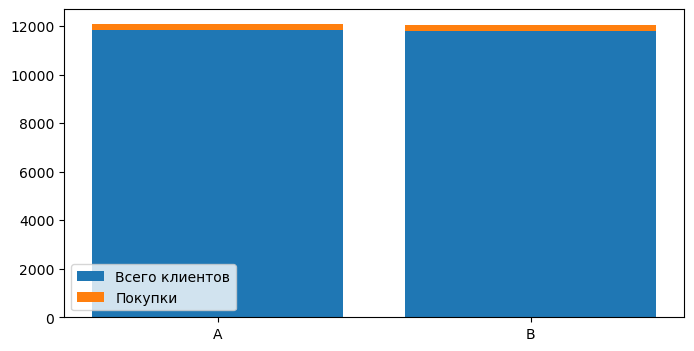

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.bar([1, 2], grouped['count']['purchase'], label='Всего клиентов')
plt.bar([1, 2], grouped['sum']['purchase'], bottom=grouped['count']['purchase'], label='Покупки')
plt.xticks([1, 2],['A', 'B'])
plt.legend()
plt.show()

Вывод о том, какая группа лучше, сделать мы не можем!

#### давайте сразу же и непараметрический критерий посмотрим (хи-квадрат)

In [29]:
chisq, pvalue, table = proportion.proportions_chisquare(np.array([k1, k2]), 
                                                   np.array([n1, n2]))

print('Results are ','chisq =%.3f, pvalue = %.3f'%(chisq, pvalue))

Results are  chisq =0.975, pvalue = 0.323


### Что насчет других метрик?

Посмотрим на выручку в двух группах. Если захотим пользоваться параметрическим критерием Т-Стьюдента, то нужно для начала убедиться, что распределение у признака нормальное - это можно сделать с помощью критерия Шапиро-Уилка.

In [30]:
from scipy.stats import shapiro

shapiro(data['revenue'])

C:\Users\kikoooiemama\anaconda3\envs\ml_business\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.011638760566711426, pvalue=0.0)

$$pvalue = 0$$

Это означает, что нулевая гипотеза отвергается. Нулевая гипотеза - выборка имеет нормальное распределение. Таким образом, использовать Т-Стьюдента мы не можем! Будем пользоваться критерием Мана-Уитни. Признак имеет ненормальное распределение..



Критерий Мана-Уитни для среднего чека (z-критерий уже не годится)

In [31]:
data.groupby('ab_group')['revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
ab_group,,,,,,,,
A,11835.0,0.404462,13.133218,0.0,0.0,0.0,0.0,1303.609284
B,11817.0,0.244794,3.176534,0.0,0.0,0.0,0.0,113.830000


Мы видим, что вроде бы различия серьезные, но понимаем при этом, что все дело скорее всего в выбросах (а среднее у нас к ним не очень устойчиво)

In [32]:
from scipy.stats import mannwhitneyu

mw_stats = mannwhitneyu(
    x=data[data['ab_group'] == 'A']['revenue'].values,
    y=data[data['ab_group'] == 'B']['revenue'].values)
mw_stats

MannwhitneyuResult(statistic=70054756.0, pvalue=0.3243889561742552)

pvalue довольно большое, нулевую гипотезу мы отклонить не можем! Это говорит нам о том, что выборки похожи.

Критерий Манна-Уитни нам <b>не позволяет</b> принять альтернативную гипотезу о разнице arpu

#### Может быть среднее количество покупок на пользователя отличается?

In [35]:
mw_stats = mannwhitneyu(x=data[data['ab_group'] == 'A']['num_purchases'].values,
                                                  y=data[data['ab_group'] == 'B']['num_purchases'].values)
mw_stats

MannwhitneyuResult(statistic=70054599.0, pvalue=0.3249718497892071)

Ситуация та же самая. Нулевую гипотезу не отвергаем, выборки похожи, альтернативную гипотезу не принимаем!

#### Давайте еще посмотрим на arppu (average revenue per paying user)

In [36]:
mw_stats = mannwhitneyu(x=data[(data['ab_group'] == 'A')&(data['purchase'] == 1)]['revenue'].values,
                                                  y=data[(data['ab_group'] == 'B')&(data['purchase'] == 1)]['revenue'].values)
mw_stats

MannwhitneyuResult(statistic=29729.5, pvalue=0.8871956616344514)

In [37]:
data[data['purchase'] == 1].groupby('ab_group')['revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
ab_group,,,,,,,,
A,256.0,18.698469,87.527589,0.259689,2.318301,4.28316,11.923141,1303.609284
B,234.0,12.362119,19.007065,0.259373,2.319883,3.98000,12.274829,113.830000


Выбрали платящих пользователей. Получаем, что выбросы все еще есть, но тем не менее критерий Мана-Уитни нам говорит, что нулевая гипотеза верна - выборки похожи.

### Выводы:

1. ни по одной из метрик мы не видим значимых различий
2. скорее всего слишком мало данных для выводов (учитывая базовую конверсию в 2 процента)
3. мы также можем посчитать сколько нам понадобится приблизительно пользователей в каждой из групп, чтобы при такой конверсии получить значимость (для этого нам нужно делать предположение о том, какое минимальное изменение нас устраивает - минимально значимый эффект)**

** например, мы хотим, чтобы конверсия выросла хотя бы на 10% 

#### Параметры (Пример):

1. базовая конверсия p=0.14
2. мы ожидаем увеличение конверсии хотя бы на 10% (относительно), иначе изменение для нас неоправдывается по тем или иным причинам

In [38]:
from scipy.stats import norm, zscore

def sample_power_probtest(p1, p2, power=0.8, sig=0.05):
    z = norm.isf([sig/2]) #two-sided t test
    zp = -1 * norm.isf([power]) 
    d = (p1-p2)
    s =2*((p1+p2) /2)*(1-((p1+p2) /2))
    n = s * ((zp + z)**2) / (d**2)
    return int(round(n[0]))

def sample_power_difftest(d, s, power=0.8, sig=0.05):
    z = norm.isf([sig/2])
    zp = -1 * norm.isf([power])
    n = s * ((zp + z)**2) / (d**2)
    return int(round(n[0]))

** link - https://stackoverflow.com/questions/15204070/is-there-a-python-scipy-function-to-determine-parameters-needed-to-obtain-a-ta

In [42]:
p = 0.14
min_effect = 0.1
alpha = 0.05
power = 0.8 #The power of a binary hypothesis test is the probability that the test rejects the null hypothesis when a specific alternative hypothesis is true


n = sample_power_probtest(p, p*(1+min_effect), power=power, sig=alpha)
print("With power={}, alpha={}, base_ctr={} and minimal effect={} we expect to have {} per variation".format(power,
                                                                                                alpha,
                                                                                                p,
                                                                                                min_effect,
                                                                                                n))

With power=0.8, alpha=0.05, base_ctr=0.14 and minimal effect=0.1 we expect to have 10043 per variation


Еще пример

In [43]:
p = 0.01
min_effect = 0.1
n = sample_power_probtest(p, p*(1+min_effect), power=power, sig=alpha)
print("With power={}, alpha={}, base_ctr={} and minimal effect={} we expect to have {} per variation".format(power,
                                                                                                alpha,
                                                                                                p,
                                                                                                min_effect,
                                                                                                n))

With power=0.8, alpha=0.05, base_ctr=0.01 and minimal effect=0.1 we expect to have 163096 per variation


## Практика 

Постановка задачи:
* Есть отток
* Можно бороться с оттоком рассылая предложения по тарифу
* Коммуникации проходят по случайной выборке клиентов (Если это отток, то делаем предложения в объеме, которое примет 50% клиентов)

In [44]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import f1_score, roc_auc_score, precision_score, classification_report, precision_recall_curve, confusion_matrix
from scipy.stats import mannwhitneyu

import itertools
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [83]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Загружаем данные

In [46]:
df = pd.read_csv('churn_data.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [47]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [48]:
# разделим на train и test. Обучающую делим на тренировочную и валидационную (будем смотреть метрики). 
# На тестовой выборке будем смотреть A/B тест.
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Exited'], axis=1), df['Exited'], random_state=2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=2)

In [73]:
#соберем наш простой pipeline, но нам понадобится написать класс для выбора нужного поля
class FeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, column):
        self.column = column

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return X[self.column]
    
class NumberSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    Use on numeric columns in the data
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[[self.key]]

# перевод категориального признака в бинарное представление
class OHEEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key
        self.columns = []

    def fit(self, X, y=None):
        self.columns = [col for col in pd.get_dummies(X, prefix=self.key).columns]
        return self

    def transform(self, X):
        X = pd.get_dummies(X, prefix=self.key)
        test_columns = [col for col in X.columns]
        for col_ in self.columns:
            if col_ not in test_columns:
                X[col_] = 0
        return X[self.columns]

# есть бинарные признаки, их кодируем через новый класс.
class OHEEncoderBin(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key
        self.columns = []

    def fit(self, X, y=None):
        B = [col for col in pd.get_dummies(X, prefix=self.key).columns]
        self.columns = B[:1]
        return self

    def transform(self, X):
        X = pd.get_dummies(X, prefix=self.key)
        return X[self.columns]
    
# возведение принзаков в степени + логарифмирование. это своего рода генерация новых признаков!
class NumericPower(BaseEstimator, TransformerMixin):
    def __init__(self, key, p=2):
        self.key = key
        self.columns = []
        self.p = p + 1 # max степень

    def fit(self, X, y=None):
        B = [self.key + str(i) for i in range(1, self.p)]
        self.columns = B + ['log']
        return self

    def transform(self, X):
        Xp = X.values.reshape(-1, 1)
        for i in range(2, self.p):
            Xp = np.hstack([Xp, (X.values.reshape(-1,1) ** i).astype(float)])
        
        Xp = np.hstack([Xp, np.log(X.values.reshape(-1,1) + 1).astype(float)])
        B = pd.DataFrame(data = Xp, index=X.index, columns=[self.columns])
        return B[self.columns]

Возведением в степень и логарифмирование для создания новых признаков мы делаем чтобы получить более сложные связи, закономерности.

In [52]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5625 entries, 7914 to 4994
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        5625 non-null   int64  
 1   CustomerId       5625 non-null   int64  
 2   Surname          5625 non-null   object 
 3   CreditScore      5625 non-null   int64  
 4   Geography        5625 non-null   object 
 5   Gender           5625 non-null   object 
 6   Age              5625 non-null   int64  
 7   Tenure           5625 non-null   int64  
 8   Balance          5625 non-null   float64
 9   NumOfProducts    5625 non-null   int64  
 10  HasCrCard        5625 non-null   int64  
 11  IsActiveMember   5625 non-null   int64  
 12  EstimatedSalary  5625 non-null   float64
dtypes: float64(2), int64(8), object(3)
memory usage: 615.2+ KB


In [53]:
X_train.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,5625.000000,5.625000e+03,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000
mean,5010.659378,1.569099e+07,651.367111,38.961956,5.036978,76976.936306,1.529067,0.706311,0.518044,100029.061995
std,2885.589113,7.212504e+04,96.316214,10.587993,2.910113,62075.983617,0.582689,0.455492,0.499719,57838.075841
min,1.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,178.190000
25%,2543.000000,1.562858e+07,585.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50454.800000
50%,5018.000000,1.569067e+07,652.000000,37.000000,5.000000,98382.720000,1.000000,1.000000,1.000000,99800.870000
75%,7519.000000,1.575401e+07,718.000000,44.000000,8.000000,127450.140000,2.000000,1.000000,1.000000,149471.130000
max,9998.000000,1.581569e+07,850.000000,92.000000,10.000000,238387.560000,4.000000,1.000000,1.000000,199970.740000


In [54]:
X_train.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
7914,7915,15777179,Ellis,687,France,Male,35,9,0.00,2,0,1,73133.82
8546,8547,15686957,Piccio,553,Germany,Male,35,2,158584.28,2,1,0,43640.16
2070,2071,15750684,Jibunoh,719,France,Female,42,4,0.00,1,1,0,28465.86


In [55]:
X_train.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

Распределение признаков:

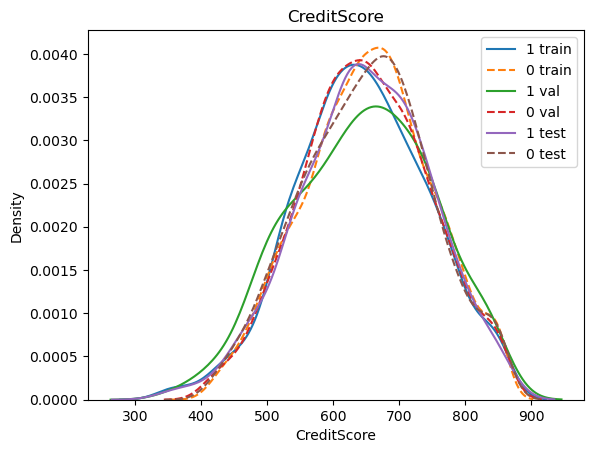

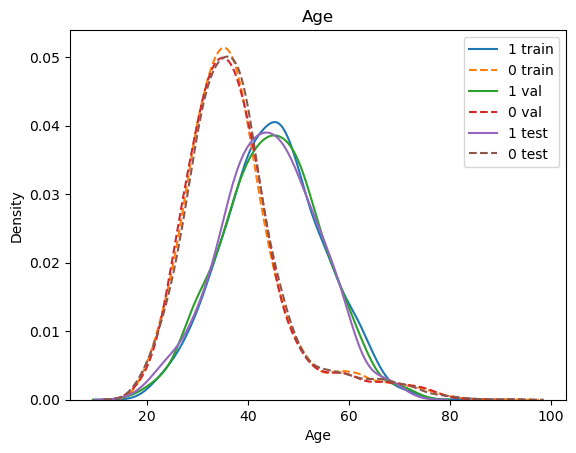

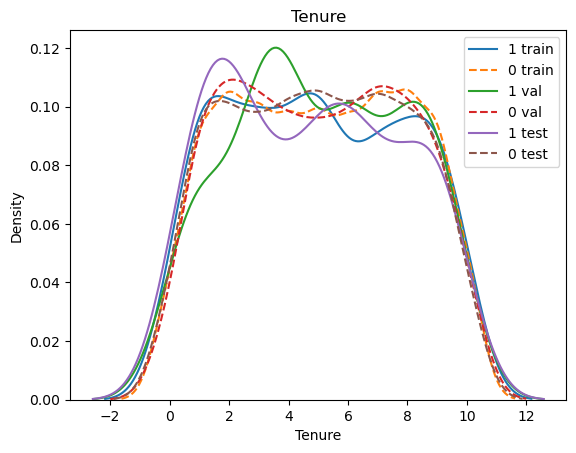

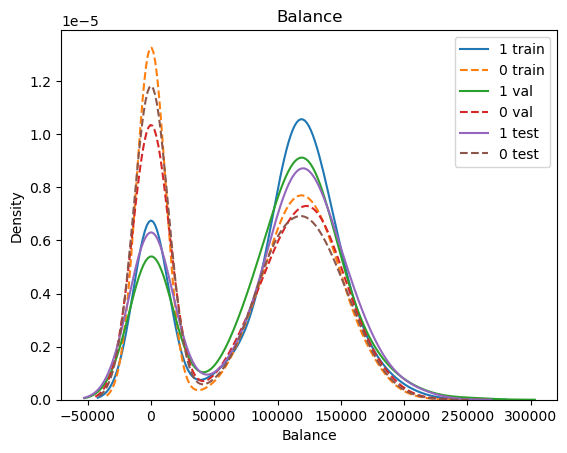

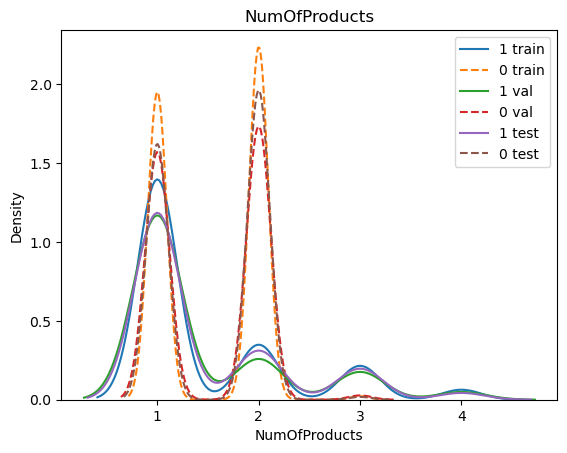

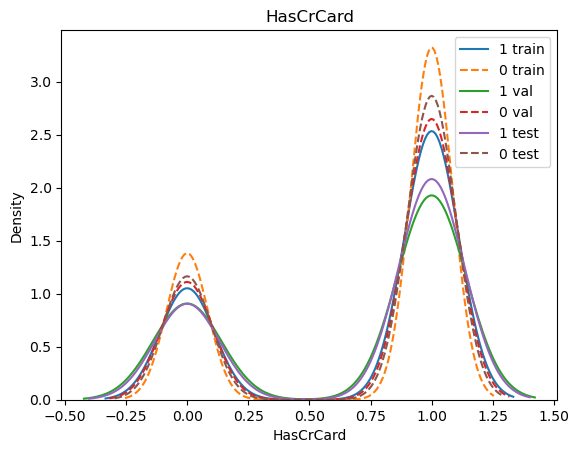

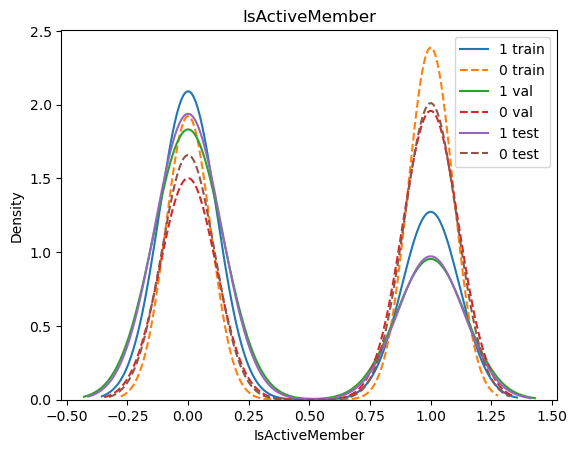

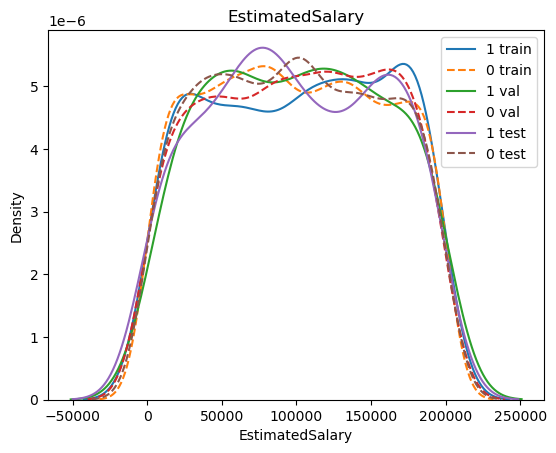

In [56]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
for i in X_train.iloc[:,2:].select_dtypes(include=numerics).columns:
    sns.kdeplot(X_train.loc[y_train==1, i], label='1 train')
    sns.kdeplot(X_train.loc[y_train==0, i], ls='--', label='0 train')
    
    sns.kdeplot(X_val.loc[y_val==1, i], label='1 val')
    sns.kdeplot(X_val.loc[y_val==0, i], ls='--', label='0 val')
    
    sns.kdeplot(X_test.loc[y_test==1, i], label='1 test')
    sns.kdeplot(X_test.loc[y_test==0, i], ls='--', label='0 test')
    plt.title(i)
    plt.legend()
    plt.show()

Мы это делаем, чтобы понять насколько похожи у нас выборки. В идеале все выборки должны быть похожими. Графики - смотрим различия и сходства.

In [59]:
categorical_col = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

for i in categorical_col:
    print(f"{i} | число уникальных значений: {len(pd.unique(X_train[i]))} уникальные значения {pd.unique(X_train[i])}")

Geography | число уникальных значений: 3 уникальные значения ['France' 'Germany' 'Spain']
Gender | число уникальных значений: 2 уникальные значения ['Male' 'Female']
HasCrCard | число уникальных значений: 2 уникальные значения [0 1]
IsActiveMember | число уникальных значений: 2 уникальные значения [1 0]


In [62]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
for i in X_train.iloc[:,2:].select_dtypes(include=numerics).columns:
    tr_v_stats = mannwhitneyu(X_train.loc[y_train==1, i], X_val.loc[y_val==1, i])
    tr_test_stats = mannwhitneyu(X_train.loc[y_train==1, i], X_test.loc[y_test==1, i])
    print(i, 'tr_v pvalue:', tr_v_stats[1], 'tr_test pvalue:', tr_test_stats[1])

CreditScore tr_v pvalue: 0.7866232465689624 tr_test pvalue: 0.3034641000707645
Age tr_v pvalue: 0.6279617228753334 tr_test pvalue: 0.16166797796336407
Tenure tr_v pvalue: 0.37488236053626833 tr_test pvalue: 0.2971971462926689
Balance tr_v pvalue: 0.6323673530278513 tr_test pvalue: 0.48079658953140836
NumOfProducts tr_v pvalue: 0.5757409273252094 tr_test pvalue: 0.8173702565186527
HasCrCard tr_v pvalue: 0.312717127876865 tr_test pvalue: 0.6921390798187875
IsActiveMember tr_v pvalue: 0.19577064636885733 tr_test pvalue: 0.08750544277909324
EstimatedSalary tr_v pvalue: 0.9275385914299212 tr_test pvalue: 0.5050647781479354


На бинарные признаки не смотрим! А остальные признаки имеют pvalue > 5%, значит выборки похожи по критерию Мана-Уитни. Смело можно обучаться, валидироваться, тестироваться!

In [65]:
categorical_columns = ['Geography']
continuous_columns = ['CreditScore', 'Tenure', 'Age', 'Balance', 'NumOfProducts', 'EstimatedSalary']
categorical_bin_columns = ['Gender', 'HasCrCard', 'IsActiveMember']

from sklearn.pipeline import Pipeline, FeatureUnion

gender = Pipeline([
    ('selector', FeatureSelector(column='Gender')),
    ('ohe', OHEEncoderBin(key='Gender'))
])
gender.fit(X_train)
gender.transform(X_test).head(3)

,Gender_Female
7878,1
3224,1
1919,0


Посмотрели бинаризацию

In [67]:
geography = Pipeline([
    ('selector', FeatureSelector(column='Geography')),
    ('ohe', OHEEncoder(key='Geography'))
])
geography.fit(X_train)
geography.transform(X_test).head(3)

,Geography_France,Geography_Germany,Geography_Spain
7878,1,0,0
3224,0,1,0
1919,1,0,0


Посмотрели категоризацию

In [74]:
Age = Pipeline([
    ('selector', FeatureSelector(column='Age')),
    ('ohe', NumericPower(key='Age', p=3))
])
Age.fit(X_train)
print(Age.transform(X_test).head(3))

      Age1    Age2      Age3       log
7878  38.0  1444.0   54872.0  3.663562
3224  41.0  1681.0   68921.0  3.737670
1919  56.0  3136.0  175616.0  4.043051


Сделали новые признаки для вещественного признака (Степень 2, Степень 3, Логарифм)

Теперь делаем пайплайны для всех признаков:

In [75]:
final_transformers = list()

for cat_col in categorical_columns:
    cat_transformer = Pipeline([
                ('selector', FeatureSelector(column=cat_col)),
                ('ohe', OHEEncoder(key=cat_col))
            ])
    final_transformers.append((cat_col, cat_transformer))
    
for cont_col in continuous_columns:
    cont_transformer = Pipeline([
                ('selector', NumberSelector(key=cont_col)),
                ('pow_2', NumericPower(key=cont_col, p=3)),
                ('Scale', StandardScaler())
            ])
    final_transformers.append((cont_col, cont_transformer))
    
for bin_col in categorical_bin_columns:
    bin_transformer = Pipeline([
                ('selector', FeatureSelector(column=bin_col)),
                ('ohe', OHEEncoderBin(key=bin_col))
            ])
    final_transformers.append((bin_col, bin_transformer))

In [76]:
final_transformers

[('Geography',
  Pipeline(steps=[('selector', FeatureSelector(column='Geography')),
                  ('ohe', OHEEncoder(key='Geography'))])),
 ('CreditScore',
  Pipeline(steps=[('selector', NumberSelector(key='CreditScore')),
                  ('pow_2', NumericPower(key='CreditScore', p=4)),
                  ('Scale', StandardScaler())])),
 ('Tenure',
  Pipeline(steps=[('selector', NumberSelector(key='Tenure')),
                  ('pow_2', NumericPower(key='Tenure', p=4)),
                  ('Scale', StandardScaler())])),
 ('Age',
  Pipeline(steps=[('selector', NumberSelector(key='Age')),
                  ('pow_2', NumericPower(key='Age', p=4)),
                  ('Scale', StandardScaler())])),
 ('Balance',
  Pipeline(steps=[('selector', NumberSelector(key='Balance')),
                  ('pow_2', NumericPower(key='Balance', p=4)),
                  ('Scale', StandardScaler())])),
 ('NumOfProducts',
  Pipeline(steps=[('selector', NumberSelector(key='NumOfProducts')),
                

Обьеденяем с моделью:

In [77]:
feats = FeatureUnion(final_transformers)

pipeline = Pipeline([
    ('features_eng', feats),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [78]:
# Обучим наш пайплайн
pipeline.fit(X_train, y_train)

Pipeline(steps=[('features_eng',
                 FeatureUnion(transformer_list=[('Geography',
                                                 Pipeline(steps=[('selector',
                                                                  FeatureSelector(column='Geography')),
                                                                 ('ohe',
                                                                  OHEEncoder(key='Geography'))])),
                                                ('CreditScore',
                                                 Pipeline(steps=[('selector',
                                                                  NumberSelector(key='CreditScore')),
                                                                 ('pow_2',
                                                                  NumericPower(key='CreditScore',
                                                                               p=4)),
                                                

In [79]:
# наши прогнозы длля валидационной выборки
preds = pipeline.predict_proba(X_val)[:, 1]
preds[:10]

array([0.62, 0.3 , 0.01, 0.  , 0.04, 0.18, 0.05, 0.53, 0.15, 0.01])

In [80]:
precision, recall, thresholds = precision_recall_curve(y_val, preds)

fscore = (2*precision*recall)/(precision+recall)
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f, Precision=%.3f, Recall=%.3f' % (thresholds[ix], 
                                                                        fscore[ix],
                                                                        precision[ix],
                                                                        recall[ix]))

Best Threshold=0.320000, F-Score=0.599, Precision=0.571, Recall=0.630


Мы уже нашли оптимальный порог

Confusion matrix, without normalization
[[1281  191]
 [ 149  254]]


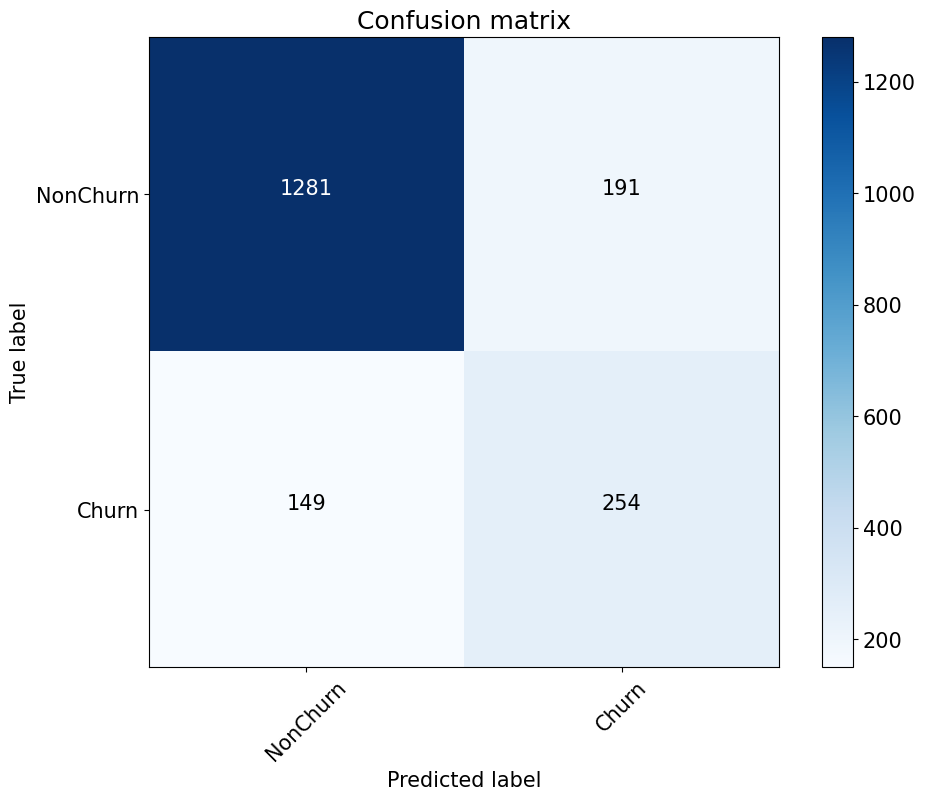

In [84]:
#мы уже нашли ранее "оптимальный" порог, когда максимизировали f_score
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y_val, preds>=thresholds[ix])
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['NonChurn', 'Churn'], title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

Теперь считаем конверсию. Конверсия это сколько людей уходит в отток от общего числа людей

In [86]:
# конверсия 
TN = cnf_matrix[0][0]
FP = cnf_matrix[0][1]
FN = cnf_matrix[1][0]
TP = cnf_matrix[1][1]

C0 = (TP + FN)/ np.sum(cnf_matrix)
C0

0.21493333333333334

Таким образом, базовая конверсия оттока у нас: 0.214
Начинаем A/B тест:
Мы хотим чтобы оттока у нас было меньше, то есть конверсия стала меньше. 

Начинаем A/B тест:

In [88]:
# делим на А и B группы
X_A, X_B, y_A, y_B = train_test_split(X_test, y_test, test_size=0.5, random_state=2)

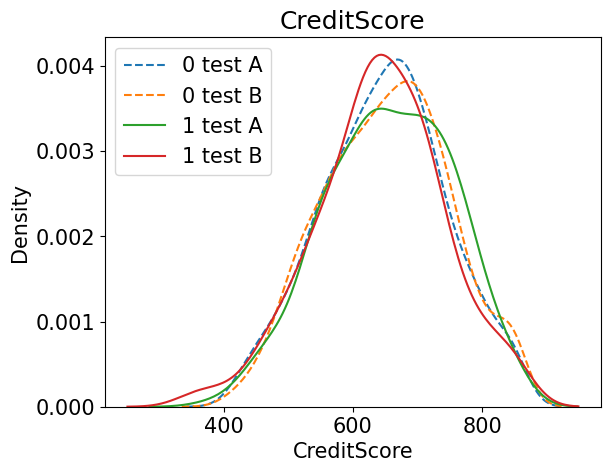

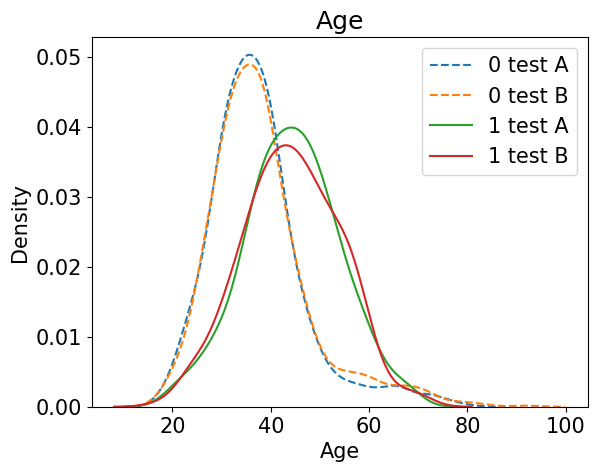

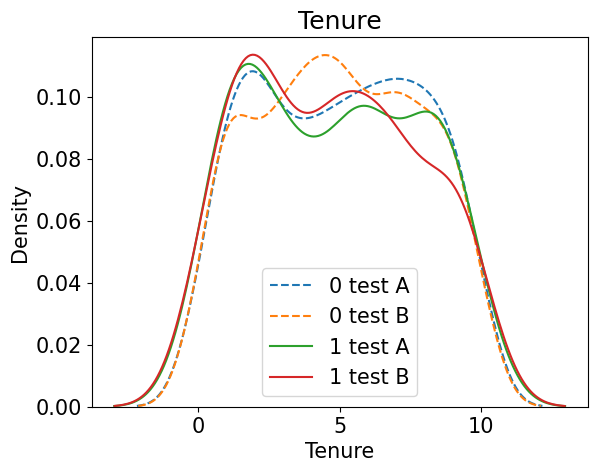

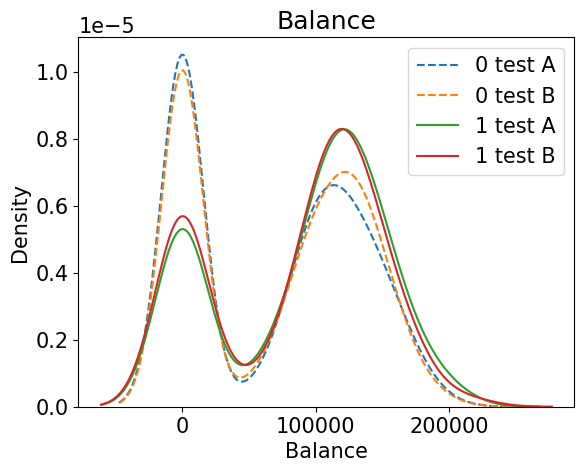

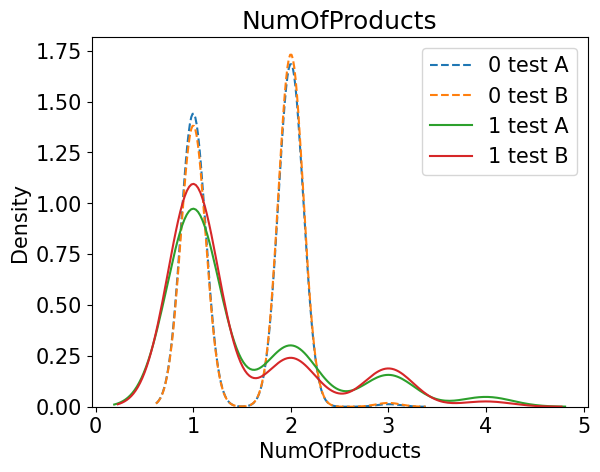

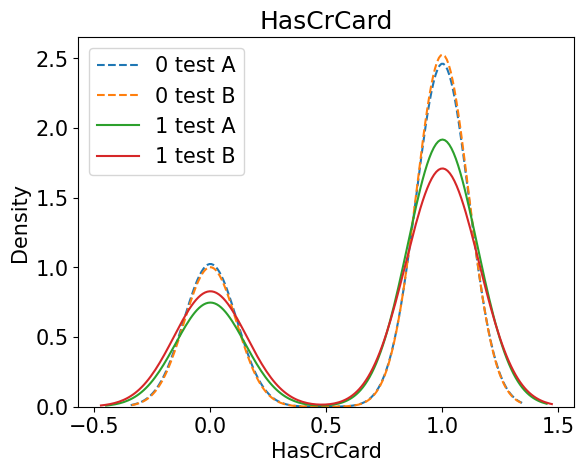

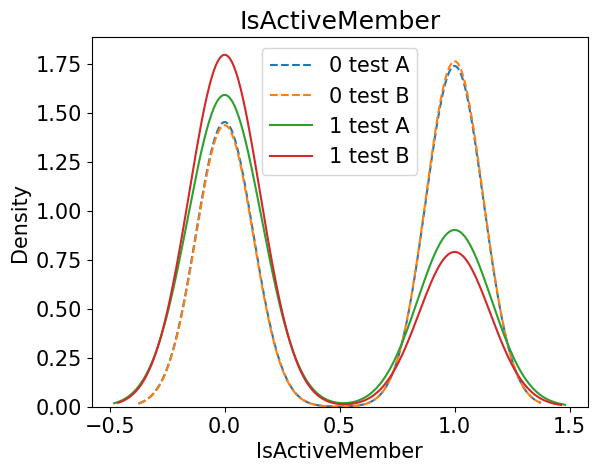

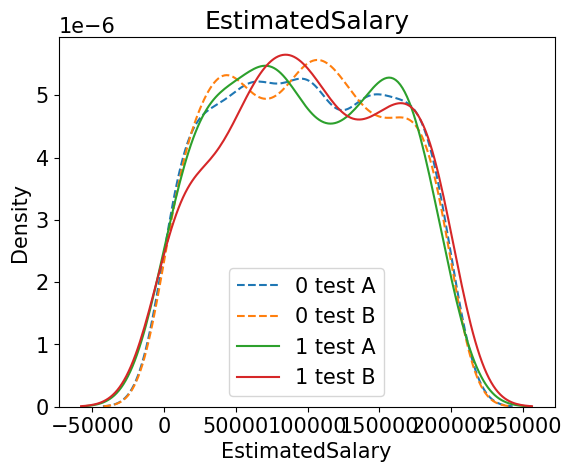

In [89]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
for i in X_train.iloc[:,2:].select_dtypes(include=numerics).columns:
    sns.kdeplot(X_A.loc[y_A==0, i], ls='--', label='0 test A')
    sns.kdeplot(X_B.loc[y_B==0, i], ls='--', label='0 test B')
    
    sns.kdeplot(X_A.loc[y_A==1, i], label='1 test A')
    sns.kdeplot(X_B.loc[y_B==1, i], label='1 test B')
    
    plt.title(i)
    plt.legend()
    plt.show()

Опять смотрим похожи ли наши группы A и B. Видим, что наши группы очень похожи!

Сделаем для нашей экспериментальной группы B применение модели (то есть предложим группе B скидочные тарифы и предложим только тем, кому сказала модель)

In [90]:
predsB = pipeline.predict_proba(X_B)[:, 1]

cnf_matrix = confusion_matrix(y_B, predsB>=thresholds[ix])
TN = cnf_matrix[0][0]
FP = cnf_matrix[0][1]
FN = cnf_matrix[1][0]
TP = cnf_matrix[1][1]
print(cnf_matrix)

[[904 107]
 [ 89 150]]


In [93]:
churn_ef = 0.5 # снижение эффективности предсказание за счет неполного действия мер по борьбе с оттоком

C0_A = (np.sum(y_A)) / y_A.shape[0] # коэффициент оттока клиентов без ML
print(C0_A)

0.1968


In [95]:
C1_MLB = (FN + (1-churn_ef) * TP) / np.sum(cnf_matrix) # коэффициент оттока клиентов при ML
print(C1_MLB)

0.1312


Видим, что конверсия уменьшилась. Теперь нужно проверить статистически и убедиться, что это неслучайно! Возможно наши результаты статистически не значимы..

In [96]:
y_churnA = y_A

y_pred = (predsB>=thresholds[ix])
ind_churn = np.where((y_pred != y_B) & (y_B == 1)) # FN
y_churnB = np.zeros(y_B.shape)
y_churnB[ind_churn] = 1

In [103]:
k1, n1 = np.sum(y_A), y_A.shape[0] # k1 - конверсия
k2, n2 = np.sum(y_churnB), y_churnB.shape[0]
k1, n1, k2, n2

(246, 1250, 89.0, 1250)

Статистический тест с помощью z-критерия Фишера

In [105]:
from statsmodels.stats import proportion

z_score, z_pvalue = proportion.proportions_ztest(np.array([k1, k2]),
                                                 np.array([n1, n2]))

print(f"Result are z_score={z_score:.3f}, pvalue={z_pvalue:.3f}")

Result are z_score=9.218, pvalue=0.000


Статистический тест с помощью критерия хи-квадрат

In [106]:
chisq, pvalue, table = proportion.proportions_chisquare(np.array([k1, k2]),
                                                 np.array([n1, n2]))

print(f"Result are chisq={chisq:.3f}, pvalue={pvalue:.3f}")

Result are chisq=84.964, pvalue=0.000


В каждом тесте мы получили значение pvalue = 0 < $\alpha$. Это означает, что нулевую гипотезу мы отвергаем! 

*Нулевая гипотеза - конвсерии в группе А и B одинаковые, Альтернативная гипотеза - конверсии в группе А и В отличаются.*

Конверсия в группе А и в группе B отличается. Мы уменьшили отток с помощью ML. Ураааа!

## Важные моменты

#### 1. Контрольный сегмент (как оценить вклад ML-решения в целом)

Таким образом, у нас теперь есть представление, как сравнивать между собой разные варианты. 

Однако на практике также может возникнуть вопрос, а какой вклад ML в целом. Т.е если мы представим ситуацию, что никаких изменений на основе ML нет, так бы выглядел сервис в таком случае? (в плане бизнес-метрик)

Чтобы ответить на этот вопрос, иногда выделяют так называемый <b>контрольный сегмент</b> - пользователей, которых никогда не затрагивают изменения на базе машинного обучения.

Например, если мы внедряем систему рекомендаций, то пользователи из контрольного сегмента не увидят эти рекомендации. 

Обычно контрольный сегмент небольшой.

#### 2. Когда вариантов несколько

1. поправка Бонферонни - https://en.wikipedia.org/wiki/Bonferroni_correction

Идея простая - для каждого попарного сравнения (пусть будет m таких сравнений) заменить alpha на alpha/m


Прекрасная ссылка для чтения на дом - https://changyaochen.github.io/multiple-comparisons-jun-2020/

## Домашнее задание

### Из вебинара

1. Скачать датасет: https://drive.google.com/file/d/1MpWBFIbqu4mbiD0BBKYX6YhS-f4mN3Z_
2. Проверить гипотезу о том, в каком варианте теста (control/personalization) больше конверсия (converted)
3. Проверить значимо ли это отличие статистически

### Из методички

#### 1. Если мы рассчитали 95% доверительный интервал для среднего значения, то какие из следующих утверждений являются верными?

Выберите несколько вариантов и попытайтесь объяснить свой выбор:

1) Если многократно повторять эксперимент, то 95 % выборочных средних значений будут принадлежать рассчитанному нами доверительному интервалу.

2) Мы можем быть на 95% уверены, что среднее значение в генеральной совокупности принадлежит рассчитанному доверительному интервалу.

3) Если многократно повторять эксперимент, для каждой выборки рассчитывать свой доверительный интервал, то в 95 % случаев истинное среднее будет находиться внутри доверительного интервала.

4) Среднее значение в генеральной совокупности точно превышает нижнюю границу 95% доверительного интервала.

5) Среднее значение в генеральной совокупности точно принадлежит рассчитанному доверительному интервалу.

#### 2. Если мы увеличиваем объем выборки в два раза (при условии, что показатель стандартного отклонения остается неизменным), то 95% доверительный интервал

Выберите один вариант из списка

1) стал более узким
2) возможны оба варианта
3) стал более широким

#### 3. В центре 95% доверительного интервала, рассчитанного по выборочным значениям, находится:

Выберите один вариант из списка

1) Значение стандартной ошибки среднего
2) Выборочное среднее значение
3) Среднее значение генеральной совокупности

#### 4. Часто на практике нулевая гипотеза отклоняется, и различия считаются статистически достоверными, если p < 0,05. Однако часто в статистике используется более жесткий критерий достоверности различий, например, при условии, что p < 0,01. Значение p-уровня значимости, которое выбирается, в качестве порога обозначается буквой α (альфа). Например, если исследователь решил, что α = 0,05, то и нулевая гипотеза будет отклоняться при условии, что p < 0,05. 

#### Если в определенной ситуации весьма рискованно отклонить нулевую гипотезу, когда она на самом деле верна, то лучше использовать показатель α равный 

Выберите один вариант из списка

1) 0,1
2) 0,001
3) 0,05
4) 0,5

#### 5. Данные некоторого исследования сообщают нам, что средний рост детей в 14 лет составляет 166 сантиметров. Однако это лишь выборочная оценка, и исследователи рассчитали 95% доверительный интервал, который составил [160, 172]. Укажите верные утверждения:

Выберите несколько вариантов и попытайтесь объяснить свой выбор:

1) У нас достаточно оснований отклонить нулевую гипотезу, что среднее в генеральной совокупности равняется 173
2) Вероятность того, что истинное среднее значение больше 172, составляет 0,01
3) У нас достаточно оснований отклонить нулевую гипотезу, что среднее в генеральной совокупности равняется 158.
4) Доверительный интервал не может иметь такие границы, т. к. выборочное стандартное отклонение равняется 10, следовательно доверительный интервал должен быть значительно шире.

#### 6. Предположим, нулевой гипотезой вашего исследования являлось предположение, что конверсия в генеральной совокупности равняется 0.4. Вы получили p = 0,12 и не смогли отклонить нулевую гипотезу. Однако позже выяснилось, что конверсия в генеральной совокупности действиетльно равна 0.4. Как можно оценить результаты?


Какой вариант корректный по вашему мнению и почему?
1) Вы не совершали ни ошибку первого рода, ни ошибку второго рода.
2) Вы совершили ошибку первого рода
3) Вы совершили ошибку второго рода

---